In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import json
import numpy as onp
import jax
import jax.numpy as jnp
import flax
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib
import timecast as tc

from mpl_toolkits import mplot3d


plt.rcParams['figure.figsize'] = [20, 10]

import tqdm.notebook as tqdm

In [2]:
from timecast.learners import PCR, AR, PredictLast
from timecast.series import crypto, enso, sp500, unemployment, uci

@tc.experiment("learner,args", [(PCR, {"history_len": 100, "k": 10}), (AR, {"history_len": 100}), (PredictLast, {})])
@tc.experiment("series", [crypto, enso, sp500, unemployment, uci])
def report_mse(learner, args, series):
    from timecast import smap
    from timecast.optim import GradientDescent
    print(learner.__name__, series.__name__)
    
    X, Y = series.generate()
    print(X.shape, Y.shape)
    model, state = learner.fit(X, Y, **args)
    optimizer_def = GradientDescent(learning_rate=1e-5)
    optimizer = optimizer_def.create(model)
    
    pred, optimizer, state = smap(X, Y, optimizer, state=state)
    
    mse = jnp.square(pred - Y).mean()
    
    return {"learner": learner.__name__, "series": series.__name__, "mse": mse, "pred": pred}

In [68]:
results = report_mse.run()

PCR timecast.series.crypto
(1732, 1) (1732, 1)
PCR timecast.series.enso
(6000, 10) (6000, 1)
PCR timecast.series.sp500
(8190, 1) (8190, 1)
PCR timecast.series.unemployment
(865, 1) (865, 1)
PCR timecast.series.uci
(2763, 1) (2763, 1)
AR timecast.series.crypto
(1732, 1) (1732, 1)
AR timecast.series.enso
(6000, 10) (6000, 1)
AR timecast.series.sp500
(8190, 1) (8190, 1)
AR timecast.series.unemployment
(865, 1) (865, 1)
AR timecast.series.uci
(2763, 1) (2763, 1)
PredictLast timecast.series.crypto
(1732, 1) (1732, 1)
PredictLast timecast.series.enso
(6000, 10) (6000, 1)
PredictLast timecast.series.sp500
(8190, 1) (8190, 1)
PredictLast timecast.series.unemployment
(865, 1) (865, 1)
PredictLast timecast.series.uci
(2763, 1) (2763, 1)


In [92]:
[result["mse"] for result in results if result["series"] == "timecast.series.unemployment"]

[DeviceArray(0.17139544, dtype=float32),
 DeviceArray(0.03948603, dtype=float32),
 DeviceArray(0.04313295, dtype=float32)]

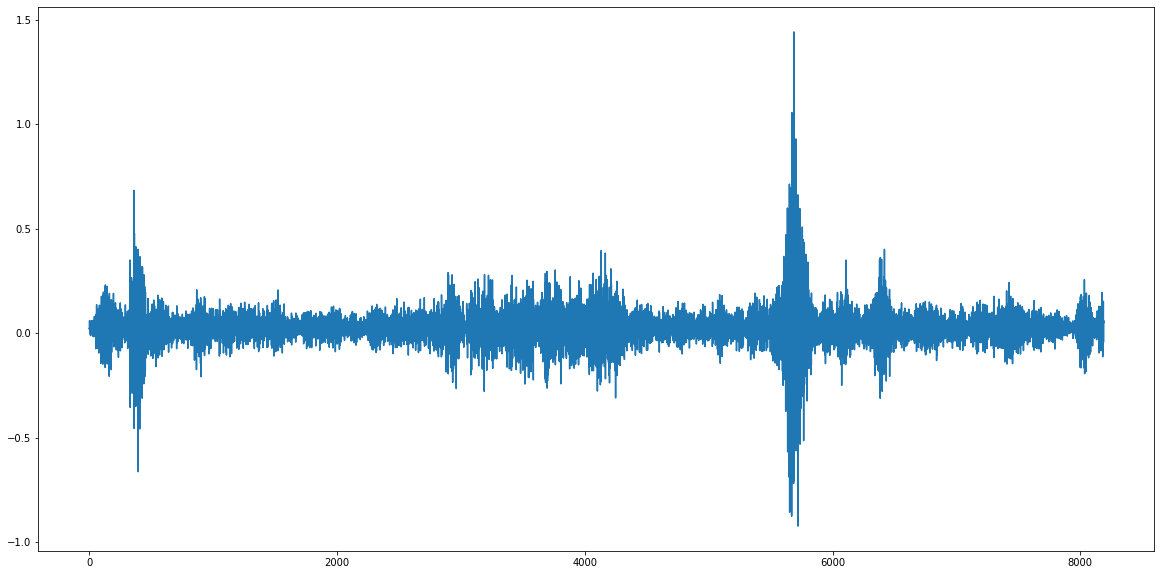

In [18]:
plt.plot(range(len(pcr_results)), pcr_results)

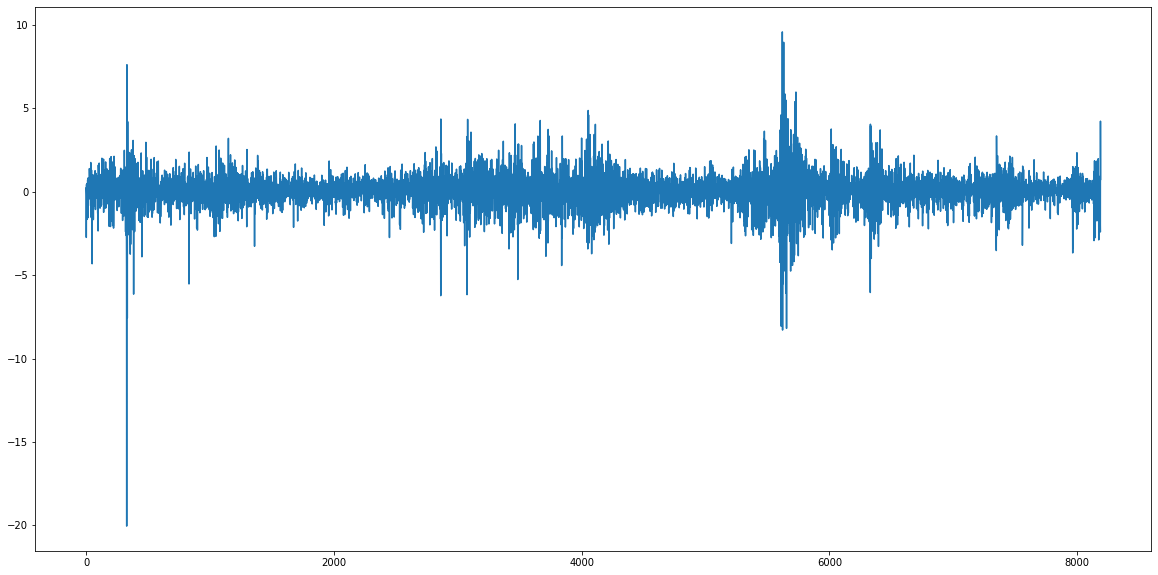

In [19]:
plt.plot(range(len(pcr_results)), Y)

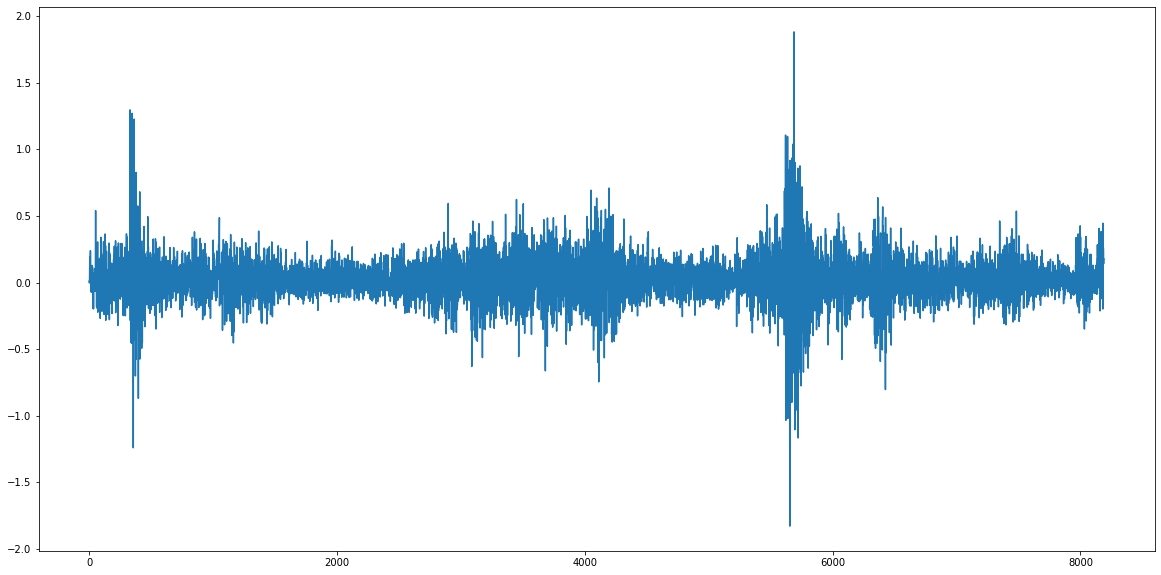

In [20]:
plt.plot(range(len(pcr_results)), ar_results)

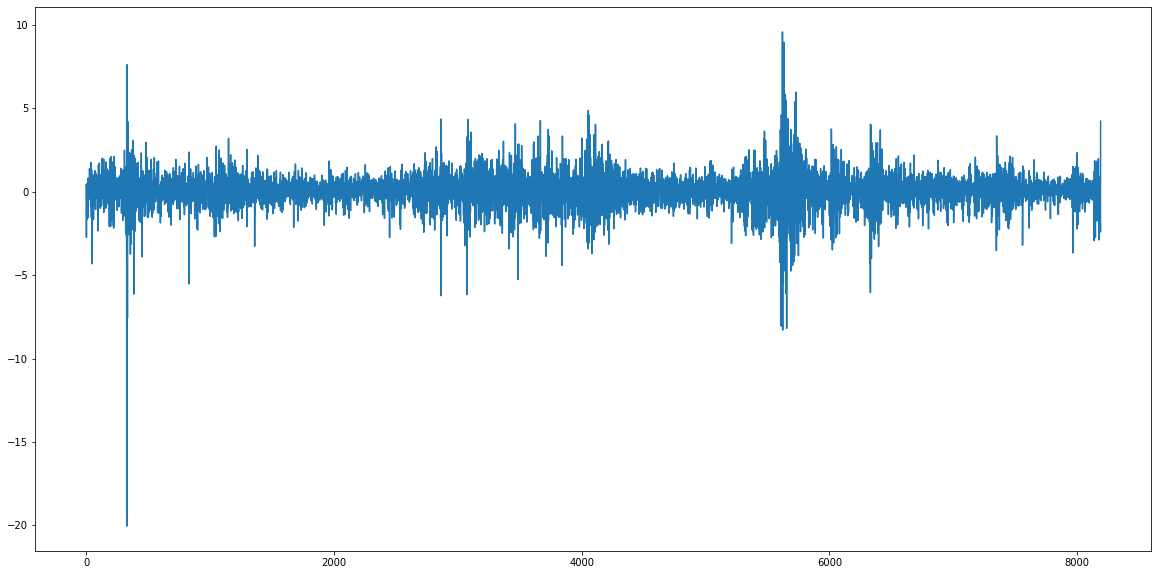

In [21]:
plt.plot(range(len(pcr_results)), pl_results)

In [109]:
series = unemployment
learner = PCR
args = {"history_len": 100, "k": 80}
X, Y = series.generate()
print(X.shape, Y.shape)
model, state = learner.fit(X, Y, **args)
optimizer_def = GradientDescent(learning_rate=1e-22)
optimizer = optimizer_def.create(model)

pred, optimizer, state = smap(X, Y, optimizer, state=state)

mse = jnp.square(pred - Y).mean()

result = {"learner": learner.__name__, "series": series.__name__, "mse": mse, "pred": pred}

(865, 1) (865, 1)


In [110]:
result

{'learner': 'PCR',
 'series': 'timecast.series.unemployment',
 'mse': DeviceArray(0.03943403, dtype=float32),
 'pred': DeviceArray([[ 3.2196193],
              [ 4.6129208],
              [ 4.7321777],
              [ 4.5783677],
              [ 4.121914 ],
              [ 3.9711647],
              [ 3.6973617],
              [ 3.9166875],
              [ 3.816164 ],
              [ 3.5471482],
              [ 3.6658864],
              [ 3.660295 ],
              [ 3.9973783],
              [ 4.6137447],
              [ 5.41495  ],
              [ 5.9615765],
              [ 6.574045 ],
              [ 6.7958784],
              [ 7.2047853],
              [ 7.3403287],
              [ 6.9906893],
              [ 7.78927  ],
              [ 6.4147983],
              [ 5.8489933],
              [ 5.8588076],
              [ 6.2142324],
              [ 6.4245462],
              [ 5.898261 ],
              [ 5.8222623],
              [ 5.5194407],
              [ 4.9703875],
              

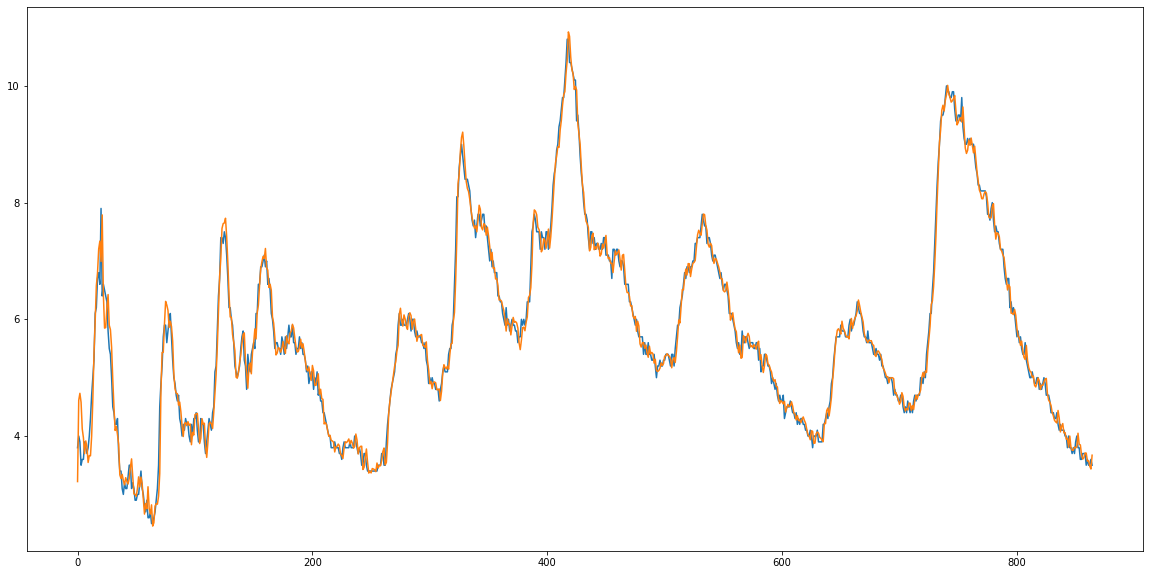

In [111]:
plt.plot(Y)
plt.plot(result["pred"])

In [88]:
Y

DeviceArray([[ 141.96],
             [ 135.3 ],
             [ 117.  ],
             ...,
             [8179.93],
             [8003.77],
             [9037.51]], dtype=float32)